# 1.1

In [14]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import re
import io
import scipy.stats as stats

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,1,2026,0,2026,0,27,0,18,NaN,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,0,675,1,465,210,18,0,4,NaN,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1,1851,0,1851,0,19,0,17,NaN,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1,1961,1,1481,480,31,0,22,NaN,2916


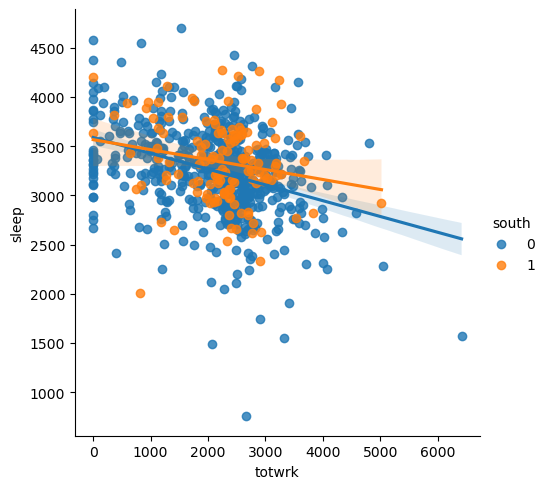

In [3]:
sns.lmplot(x='totwrk', y='sleep', hue='south', data=df);

# 1.2 

$$
H_0: \beta_{sleep} = \beta_{totwrk} = \beta_{age} = \beta_{smsa} = 0
$$
$$
H_1: \beta^2_{sleep} + \beta^2_{totwrk} + \beta^2_{age} + \beta^2_{smsa} > 0
$$

In [4]:
data_string = '''R2                      0.115          0.126    '''
rest, unrest =np.float_(re.findall(r'([-+]?\d+.\d+)', data_string)) 

In [5]:
F_obs = (unrest - rest)/(1-unrest)*(len(df)-8)/4
F_obs.round(2)

2.2

In [6]:
alpha = 0.05 
F_cr = stats.f.ppf(1-alpha,4,len(df)-8)
F_cr.round(2)

2.38

$$
F_{obs} < F_{cr} 
$$


Данные сгласуются с гипотезой Н0. Структурные сдвиги незначимы

# 1.3

$$
H_0 : \beta_{sleep} = \beta_{totwrk} = \beta_{age} = \beta_{smsa}
$$
$$
H_1 : \beta^2_{sleep} + \beta^2_{totwrk} + \beta^2_{age} + \beta^2_{smsa}
$$

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,1,2026,0,2026,0,27,0,18,NaN,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,0,675,1,465,210,18,0,4,NaN,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1,1851,0,1851,0,19,0,17,NaN,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1,1961,1,1481,480,31,0,22,NaN,2916


In [10]:
slp = smf.ols(data = df, formula = 'sleep~ totwrk + age+ smsa+south+totwrk:south+age:south+smsa:south').fit()
slp.params.round(2)

Intercept       3557.51
totwrk            -0.16
age                1.49
smsa             -61.55
south           -407.21
totwrk:south       0.08
age:south          8.27
smsa:south        49.43
dtype: float64

In [11]:
models = smf.ols(data=df, formula='sleep~ totwrk + age+ smsa+south+totwrk:south+age:south+smsa:south').fit()
models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sleep   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     15.04
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           2.31e-18
Time:                        19:20:57   Log-Likelihood:                -5256.0
No. Observations:                 706   AIC:                         1.053e+04
Df Residuals:                     698   BIC:                         1.056e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3557.5131     75.504     47.117      0.000    3409.270    3705.756
totwrk          -0.1607      0.018     -9.062      0.000      -0.196      -0.126
age              1.4852      1.545      0.961      0.337      -1.548       4.519
smsa           -61.5538     34.856     -1.766      0.078    -129.990       6.882
south         -407.2056    189.627     -2.147      0.032    -779.513     -34.898
totwrk:south     0.0785      0.050      1.556      0.120      -0.021       0.177
age:south        8.2666      3.495      2.365      0.018       1.405      15.128
smsa:south      49.4288    107.111      0.461      0.645    -160.870     259.727
==============================================================================
Omnibus:                       72.398   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.156
Skew:                          -0.521   Prob(JB):                     1.54e-43
Kurtosis:                       5.370   Cond. No.                     2.92e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
data_string='''coef	std.err
Intercept	3557.5131	75.504
totwrk	-0.1607	0.018
age	1.4852	1.545
smsa	-61.5538	34.856	
totwrk:south	0.0785	0.050
age:south	8.2666	3.495	
smsa:south	49.4288	107.111	'''

In [15]:
df=pd.read_csv(io.StringIO(data_string),sep='\s+')
df

,coef,std.err
Intercept,3557.5131,75.504
totwrk,-0.1607,0.018
age,1.4852,1.545
smsa,-61.5538,34.856
totwrk:south,0.0785,0.050
age:south,8.2666,3.495
smsa:south,49.4288,107.111


In [16]:
df['t_nablud']=df['coef']/df['std.err']
df

,coef,std.err,t_nablud
Intercept,3557.5131,75.504,47.116883
totwrk,-0.1607,0.018,-8.927778
age,1.4852,1.545,0.961294
smsa,-61.5538,34.856,-1.765946
totwrk:south,0.0785,0.050,1.570000
age:south,8.2666,3.495,2.365265
smsa:south,49.4288,107.111,0.461473


In [17]:
alpha=0.1
t_crit = stats.t.ppf(1-alpha/2,706-8-1) #(1-alpha/2, n-k-1)
round(t_crit,3)

1.647

In [18]:
df['Znachimosty'] = df.apply(lambda x: 'znachim' if np.abs(x['t_nablud'])>t_crit else 'ne znachim', axis=1) 
df

,coef,std.err,t_nablud,Znachimosty
Intercept,3557.5131,75.504,47.116883,znachim
totwrk,-0.1607,0.018,-8.927778,znachim
age,1.4852,1.545,0.961294,ne znachim
smsa,-61.5538,34.856,-1.765946,znachim
totwrk:south,0.0785,0.050,1.570000,ne znachim
age:south,8.2666,3.495,2.365265,znachim
smsa:south,49.4288,107.111,0.461473,ne znachim


In [19]:
date_string = '''R2                      0.115          0.131    '''
rest, unrest =np.float_(re.findall(r'([-+]?\d+.\d+)', date_string)) 

In [20]:
F_obs = (unrest - rest)/(1-unrest)*(706-8)/4
F_obs.round(2)

3.21

In [21]:
models.f_test('south=totwrk:south=age:south=smsa:south=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=3.144161507361787, p=0.014101731606034774, df_denom=698, df_num=4>

In [22]:
alpha = 0.1
F_cr = stats.f.ppf(1-alpha,4,706-8)
round(F_cr,2)

1.95

$$
F_{nabl} > F_{crit}
$$

отвергаем гипотезу Н0

# Задача 1.4

# Гипотеза

$$
H_0: \beta_{south} = \beta_{age*south} = \beta_{IQ*south} = \beta_{urban*south} = \beta_{married*south} = 0
$$
$$
H_1: \beta^2_{south} + \beta^2_{age*south} + \beta^2_{IQ*south} + \beta^2_{urban*south} + \beta^2_{married*south} > 0
$$

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/wage2.csv')
df

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0,6.645091
1,808,50,119,41,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0,6.694562
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0,6.715384
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0,6.476973
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0,6.331502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,520,40,79,28,16,6,1,30,1,1,1,0,0,1.0,11.0,NaN,6.253829
931,1202,40,102,32,13,10,3,31,1,0,1,1,7,7.0,8.0,6.0,7.091742
932,538,45,77,22,12,12,10,28,1,1,1,0,9,NaN,7.0,NaN,6.287858
933,873,44,109,25,12,12,12,28,1,0,1,0,1,1.0,NaN,11.0,6.771935


In [24]:
date_string = '''R2                      0.188          0.205        '''
rest, unrest =np.float_(re.findall(r'([-+]?\d+.\d+)', date_string)) 

In [25]:
F_obs = (unrest - rest)/(1-unrest)*(935-10)/5
F_obs.round(2)

3.96

In [26]:
alpha = 0.05
F_cr = stats.f.ppf(1-alpha,5,935-10)
round(F_cr,2)

2.22

$$
F_{nabl} > F_{cr}
$$

данные не согласуются с нулевой гипотезой, есть основания отвергнуть гипотезу

# 1.5

Гипотеза

$$
H_0: \beta_{urban} = \beta_{age*urban} = \beta_{IQ*urban} = \beta_{urban*south} =  0
$$
$$
H_1: \beta^2_{urban} + \beta^2_{age*urban} + \beta^2_{IQ*urban} + \beta^2_{urban*south}  > 0
$$

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/wage2.csv')
df

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0,6.645091
1,808,50,119,41,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0,6.694562
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0,6.715384
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0,6.476973
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0,6.331502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,520,40,79,28,16,6,1,30,1,1,1,0,0,1.0,11.0,NaN,6.253829
931,1202,40,102,32,13,10,3,31,1,0,1,1,7,7.0,8.0,6.0,7.091742
932,538,45,77,22,12,12,10,28,1,1,1,0,9,NaN,7.0,NaN,6.287858
933,873,44,109,25,12,12,12,28,1,0,1,0,1,1.0,NaN,11.0,6.771935


In [28]:
rest=0.146
unrest=0.182

In [29]:
F_obs = (unrest - rest)/(1-unrest)*(935-8)/4
round(F_obs, 2)

10.2

In [30]:
alpha = 0.1
F_cr = stats.f.ppf(1-alpha,4,935-8)
round(F_cr,2)

1.95

$$
F_{obs} > F_{cr}
$$

данные не согласуются с нулевой гипотезой, есть основания отвергнуть гипотезу

# 2.1

# Гипотеза

$$
H_0: \beta_{colour_e} = \beta_{colour_f} = \beta_{colour_g} = \beta_{colour_H} =  0
$$
$$
H_1: \beta^2_{colour_e} + \beta^2_{colour_f} + \beta^2_{colour_g} + \beta^2_{colour_H}  > 0
$$

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/Diamond.csv')
df

,carat,colour,clarity,certification,price
0,0.30,D,VS2,GIA,1302
1,0.30,E,VS1,GIA,1510
2,0.30,G,VVS1,GIA,1510
3,0.30,G,VS1,GIA,1260
4,0.31,D,VS1,GIA,1641
...,...,...,...,...,...
303,1.01,I,VS1,HRD,8175
304,1.02,F,VVS2,HRD,10796
305,1.06,H,VVS2,HRD,9890
306,1.02,H,VS2,HRD,8959


In [32]:
df_all = pd.get_dummies(df.loc[:,['carat','colour','certification','price']])
df_all

,carat,price,colour_D,colour_E,colour_F,colour_G,colour_H,colour_I,certification_GIA,certification_HRD,certification_IGI
0,0.30,1302,1,0,0,0,0,0,1,0,0
1,0.30,1510,0,1,0,0,0,0,1,0,0
2,0.30,1510,0,0,0,1,0,0,1,0,0
3,0.30,1260,0,0,0,1,0,0,1,0,0
4,0.31,1641,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
303,1.01,8175,0,0,0,0,0,1,0,1,0
304,1.02,10796,0,0,1,0,0,0,0,1,0
305,1.06,9890,0,0,0,0,1,0,0,1,0
306,1.02,8959,0,0,0,0,1,0,0,1,0


In [33]:
model_d = smf.ols(formula='np.log(price)~carat+I(carat**2)+colour_E+colour_F+colour_G+colour_H+colour_I+certification_HRD+certification_IGI',data=df_all).fit()
model_d.params

Intercept            5.866015
carat                5.667499
I(carat ** 2)       -2.153394
colour_E            -0.076348
colour_F            -0.152412
colour_G            -0.227155
colour_H            -0.313470
colour_I            -0.408190
certification_HRD    0.042463
certification_IGI    0.085451
dtype: float64

In [34]:
model_d.f_test('colour_E=colour_F=colour_G=colour_H=colour_I=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=71.54686523424247, p=5.202465260125759e-49, df_denom=298, df_num=5>

In [35]:
alpha=0.01
stats.f.ppf(1-alpha,5,len(df_all)-10).round(2)

3.08

данные не согласуются с нулевой гипотезой, есть основания отвергнуть гипотезу

# Гипотеза

$$
H_0: \beta_{certificationHDR} = \beta_{certificationIGI} =   0
$$
$$
H_1: \beta^2_{certificationHDR} + \beta^2_{certificationIGI}  > 0
$$

In [36]:
model_d.f_test('certification_HRD=certification_IGI=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=13.084620097371204, p=3.5745772535777896e-06, df_denom=298, df_num=2>

In [37]:
alpha=0.01
stats.f.ppf(1-alpha,2,len(df_all)-8).round(2)

4.68

данные не согласуются с нулевой гипотезой, есть основания отвергнуть гипотезу

# Задача 2.2

# Гипотеза

$$
H_0: \beta_{colour_e} = \beta_{colour_f} = \beta_{colour_g} = \beta_{colour_H}= \beta_{colour_I} = \beta_{colour_J}  = 0
$$
$$
H_1: \beta^2_{colour_e} + \beta^2_{colour_f} + \beta^2_{colour_g} + \beta^2_{colour_H} + \beta_{colour_I} + \beta_{colour_J} > 0
$$

In [38]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/diamonds.csv')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/diamonds.csv')
df_all = pd.get_dummies(df.loc[:,['price','carat','color','cut','x','y','z' ]])
df_all

,price,carat,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,326,0.23,3.95,3.98,2.43,0,1,0,0,0,0,0,0,0,1,0,0
1,326,0.21,3.89,3.84,2.31,0,1,0,0,0,0,0,0,0,0,1,0
2,327,0.23,4.05,4.07,2.31,0,1,0,0,0,0,0,0,1,0,0,0
3,334,0.29,4.20,4.23,2.63,0,0,0,0,0,1,0,0,0,0,1,0
4,335,0.31,4.34,4.35,2.75,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,2757,0.72,5.75,5.76,3.50,1,0,0,0,0,0,0,0,0,1,0,0
53936,2757,0.72,5.69,5.75,3.61,1,0,0,0,0,0,0,0,1,0,0,0
53937,2757,0.70,5.66,5.68,3.56,1,0,0,0,0,0,0,0,0,0,0,1
53938,2757,0.86,6.15,6.12,3.74,0,0,0,0,1,0,0,0,0,0,1,0


In [40]:
df_all = df_all.rename(columns={'cut_Very Good': 'cut_VeryGood'})
df_all

,price,carat,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_VeryGood
0,326,0.23,3.95,3.98,2.43,0,1,0,0,0,0,0,0,0,1,0,0
1,326,0.21,3.89,3.84,2.31,0,1,0,0,0,0,0,0,0,0,1,0
2,327,0.23,4.05,4.07,2.31,0,1,0,0,0,0,0,0,1,0,0,0
3,334,0.29,4.20,4.23,2.63,0,0,0,0,0,1,0,0,0,0,1,0
4,335,0.31,4.34,4.35,2.75,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,2757,0.72,5.75,5.76,3.50,1,0,0,0,0,0,0,0,0,1,0,0
53936,2757,0.72,5.69,5.75,3.61,1,0,0,0,0,0,0,0,1,0,0,0
53937,2757,0.70,5.66,5.68,3.56,1,0,0,0,0,0,0,0,0,0,0,1
53938,2757,0.86,6.15,6.12,3.74,0,0,0,0,1,0,0,0,0,0,1,0


In [41]:
model_d = smf.ols(formula='np.log(price)~carat+I(carat**2)+color_E+color_F+color_G+color_H+color_I+color_J+cut_Good+cut_VeryGood+cut_Premium+cut_Ideal+x+y+z',data=df_all).fit()
model_d.params

Intercept        3.991634
carat            2.535459
I(carat ** 2)   -0.645788
color_E         -0.030235
color_F         -0.039489
color_G         -0.071381
color_H         -0.210150
color_I         -0.307512
color_J         -0.432402
cut_Good         0.118383
cut_VeryGood     0.177357
cut_Premium      0.161182
cut_Ideal        0.250758
x                0.338985
y                0.014541
z                0.063132
dtype: float64

In [42]:
model_d.f_test('color_E=color_F=color_G=color_H=color_I=color_J=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=2282.3701477852487, p=0.0, df_denom=5.39e+04, df_num=6>

In [43]:
stats.f.ppf(1-0.05,6,len(df_all)-6).round(2)

2.1

данные не согласуются с нулевой гипотезой, есть основания отвергнуть гипотезу

$$
H_0: \beta_{cutgood} = \beta_{cutverygood} = \beta_{cutpremium} = \beta_{cutideal}= 0
$$
$$
H_1: \beta^2_{cutgood} + \beta^2_{cutverygood} + \beta^2_{cutpremium} + \beta^2_{cutideal}  > 0
$$

In [44]:
model_d.f_test('cut_Good=cut_VeryGood=cut_Premium=cut_Ideal=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=797.0664644236602, p=0.0, df_denom=5.39e+04, df_num=4>

In [45]:
alpha=0.05
stats.f.ppf(1-alpha,4,len(df_all)-16).round(2)

2.37

данные не согласуются с нулевой гипотезой, есть основания отвергнуть гипотезу